<a href="https://colab.research.google.com/github/Hristo2076/ml_processes/blob/main/LR_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Задание**
**Цель:** изучить применение модели логистической регрессии и \
метода опорных векторов в задаче бинарной классификации.



In [ ]:
#Импортируем нужные нам бибилиотека
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
import seaborn as sns


##**load the DataFrame**

In [ ]:
adult = pd.read_csv('adult.csv',sep=',').applymap(lambda x: np.nan if x == '?' else x)
adult[:500:20]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
20,34,Private,107914,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,47,United-States,>50K
40,65,Private,136384,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
60,30,Private,101135,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States,<=50K
80,45,Self-emp-inc,67001,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,50,United-States,<=50K
100,51,NaN,189762,Some-college,10,Married-civ-spouse,NaN,Wife,White,Female,0,0,18,United-States,<=50K
120,31,Local-gov,198770,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,Female,0,0,60,United-States,<=50K
140,46,Private,83822,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
160,55,Private,43064,11th,7,Married-civ-spouse,Other-service,Husband,White,Male,0,0,30,United-States,<=50K
180,34,Private,198613,Masters,14,Never-married,Exec-managerial,Own-child,White,Male,4650,0,40,United-States,<=50K


In [ ]:
adult.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
adult.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [ ]:
#fill all NAN, often components
adult = adult.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
adult.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Не нашел сввязи между колонками с пропусками, решил заполнить грубо и локанично часто встречаемыми значениями

##**Data transform**

In [ ]:
adult.income.loc[(adult.income =='<=50K')] = 0
adult.income.loc[(adult.income =='>50K')] = 1
adult.income[:5]

<ipython-input-7-48278d7e0355>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult.income.loc[(adult.income =='<=50K')] = 0
<ipython-input-7-48278d7e0355>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult.income.loc[(adult.income =='>50K')] = 1


0    0
1    0
2    1
3    1
4    0
Name: income, dtype: object

In [ ]:
#were there losses or not
adult['capital-gain'] = np.where(adult['capital-gain'] == 0,0,1)
adult['capital-loss'] = np.where(adult['capital-loss'] == 0,0,1)


In [ ]:
#male or female
adult.gender = adult.gender.map({'Male':1,'Female':0})

In [ ]:
#int(adult.education) == adult['educational-num']
adult = adult.drop('education',axis=1)
adult[:5]

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,1
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,1,0,40,United-States,1
4,18,Private,103497,10,Never-married,Prof-specialty,Own-child,White,0,0,0,30,United-States,0


##**EDA**

In [ ]:
x = adult.groupby(['age','income']).agg({'income':'count'}).rename(columns={'income':'counts'})
x = x.reset_index()

In [ ]:
x1 = x[x['income'] == 0]
x2 = x[x['income'] != 0]

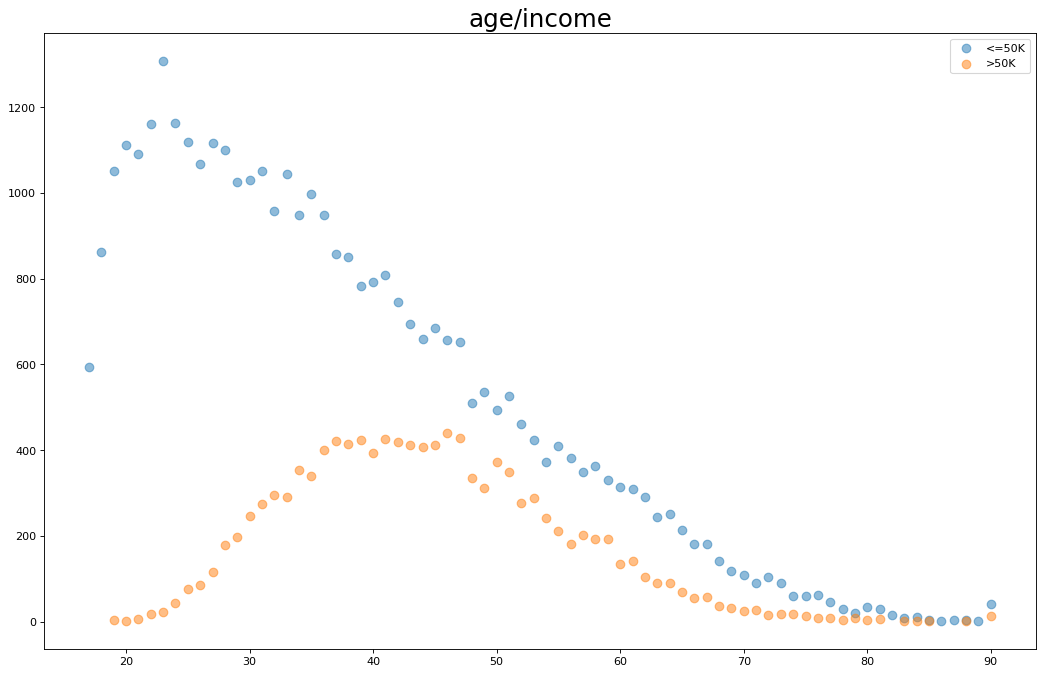

In [ ]:
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
plt.scatter(x1.age,x1.counts,
            s=60,
            alpha=0.5,
            label='<=50K')
plt.scatter(x2.age,x2.counts,
            s=60,
            alpha=0.5,
            label='>50K')

# Decorations
plt.title('age/income', fontsize=22)
plt.legend(loc='upper right',)
plt.show()

На графике показано распределение прибыли, разбитое по доходу и сгрупированно по возрасту 

In [ ]:
x_ = adult.groupby(['race','income']).agg({'income':'count'}).rename(columns={'income':'counts'})
x_ = x_.reset_index()
x_

,race,income,counts
0,Amer-Indian-Eskimo,0,415
1,Amer-Indian-Eskimo,1,55
2,Asian-Pac-Islander,0,1110
3,Asian-Pac-Islander,1,409
4,Black,0,4119
5,Black,1,566
6,Other,0,356
7,Other,1,50
8,White,0,31155
9,White,1,10607


In [ ]:
x1_ = x_[x_['income'] == 0]
x2_ = x_[x_['income'] != 0]

<ipython-input-16-3e593b0f901e>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=x1_.race,y=x1_.counts,
<ipython-input-16-3e593b0f901e>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=x2_.race,y=x2_.counts,
<ipython-input-16-3e593b0f901e>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Amer-Indian-Eskimo'),
  Text(1, 0, 'Asian-Pac-Islander'),
  Text(2, 0, 'Black'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'White')])

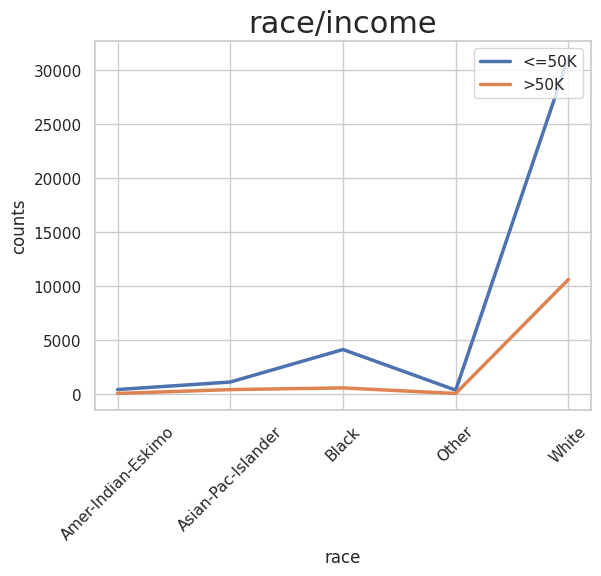

In [ ]:
sns.set_theme(style="whitegrid")



sns.lineplot(x=x1_.race,y=x1_.counts, 
             palette="tab10", 
             linewidth=2.5,
             label='<=50K')
sns.lineplot(x=x2_.race,y=x2_.counts, 
             palette="tab10", 
             linewidth=2.5,
             label='>50K')

plt.title('race/income', fontsize=22)
plt.legend(loc='upper right')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.xticks(rotation=45)

График распределения уровня дохода сгрупированные по рассе 

#**ML_model**

In [ ]:
from pandas.core.reshape.encoding import get_dummies
#OneHotEncoder
X_ = get_dummies(adult,columns=['workclass','marital-status',
                               'race','relationship',
                               'occupation','native-country'],drop_first=True)
X_[:5]

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,1,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,0,30,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X = X_.drop('income',axis=1) 
y = X_['income']

In [ ]:
#train test split
X, y = make_classification(random_state=0)
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 train_size = 0.80,
                                                 test_size = 0.20,
                                                 random_state=33)

###**LogisticRegression**

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('LR',LogisticRegression(max_iter=1000))])

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('LR', LogisticRegression(max_iter=1000))])

In [ ]:
pipe.score(X_test,y_test)

0.85

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
target_names = ['<=50K','>50K']


print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       <=50K       0.79      1.00      0.88        11
        >50K       1.00      0.67      0.80         9

    accuracy                           0.85        20
   macro avg       0.89      0.83      0.84        20
weighted avg       0.88      0.85      0.84        20



###**SVM**

In [ ]:
pipe_1 = Pipeline([('scaler', StandardScaler()),
                 ('svc',SVC())])

In [ ]:
pipe_1.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [ ]:
pipe_1.score(X_test,y_test)

0.8

In [ ]:
y_pred_1 = pipe_1.predict(X_test)

In [ ]:
target_names = ['<=50K','>50K']


print(classification_report(y_test, y_pred_1, target_names=target_names))

              precision    recall  f1-score   support

       <=50K       0.77      0.91      0.83        11
        >50K       0.86      0.67      0.75         9

    accuracy                           0.80        20
   macro avg       0.81      0.79      0.79        20
weighted avg       0.81      0.80      0.80        20



**Общие выводы:** 

1. Дабы не терять 7% данных я грубо заполнил пропуски часто встречаемыми показателями в каждом их признаков  \
2. Логистическая регрессия хорошо себя поазала как на `train` так и на `test` данных \
3. для метода опорных векторов результат также весьма впечатляющий ,но всеже чуть хуже чем у `lr`
4. в целом не вызывает сомнения, что результаты моделирования и предсказания сильно зависят от действительной реальности - то есть от предоставленного датасета признаков и целевого признака. Все это - отражение действительно существующих взаимозависимостей этих показателей. И зависимости могут быть разными для разных объектов реальности. Поэтому выводы предыдущих пунктов, которые я сделал, строго говоря, применимы только для данного избранного датасета. В других случаях нужно играть с моделями и подбирать наиболее адекватные по сочетанию результативности и затрат ресурсов на модель.